In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import ensemble, tree, linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

f:\python-3.6\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
f:\python-3.6\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
f:\python-3.6\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
housing = pd.read_csv('housing.csv')

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [6]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


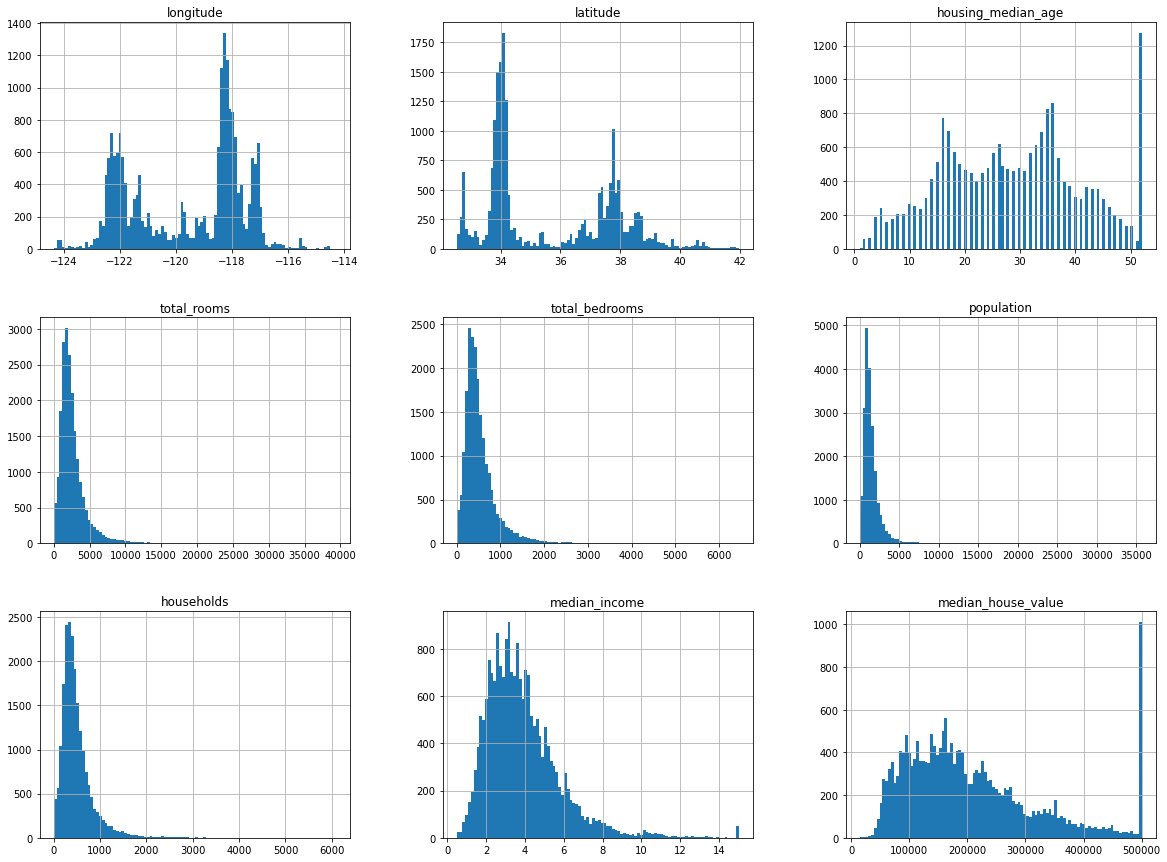

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=100, figsize=(20,15))
plt.show()

In [9]:
import numpy as np
np.random.seed(42)

<AxesSubplot:>

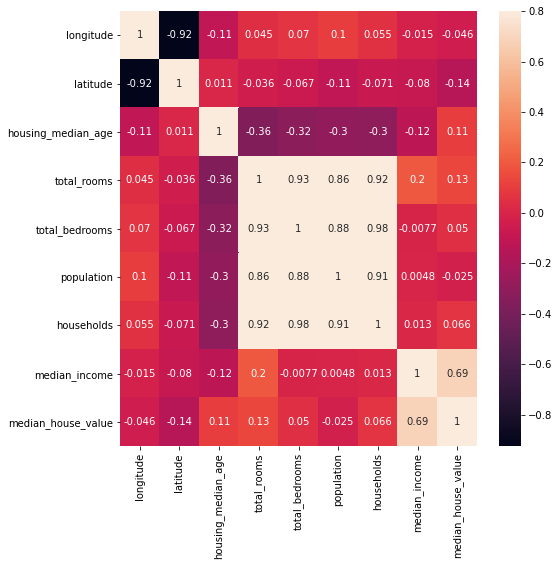

In [10]:
corr = housing.corr()
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corr, vmax=.8, annot=True)


In [11]:
corr.sort_values(["median_house_value"], ascending = False, inplace = True)
print(corr.median_house_value)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


# More Visualization

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

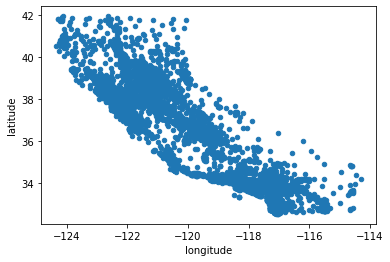

In [12]:
housing.plot(kind='scatter',x='longitude',y='latitude')

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

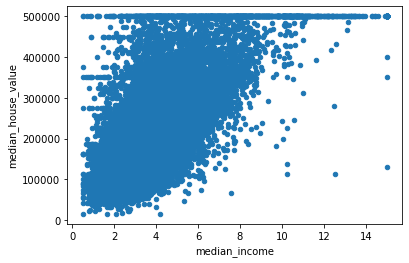

In [13]:
housing.plot(kind='scatter',x='median_income',y='median_house_value')

In [14]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [15]:
corr_matrix=housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

<AxesSubplot:>

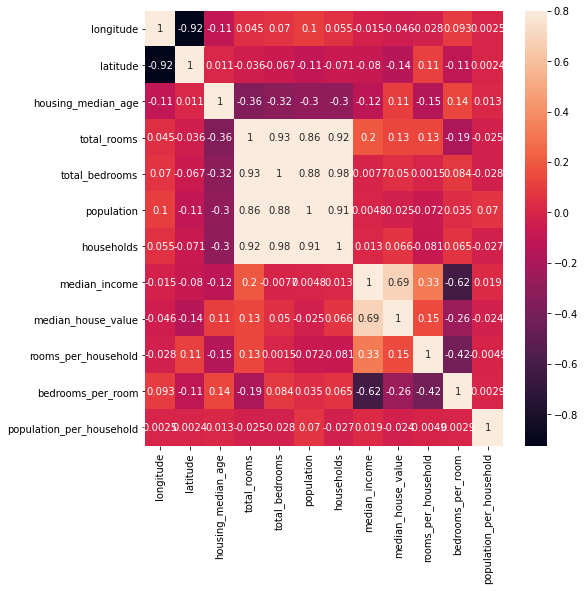

In [16]:
corr = housing.corr()
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corr, vmax=.8, annot=True)


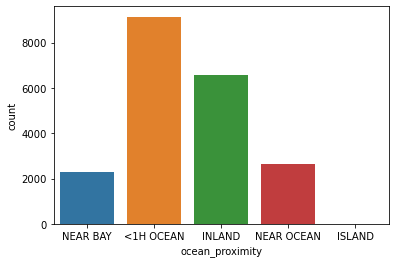

In [17]:
sns.countplot('ocean_proximity', data = housing)
plt.show()


In [18]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing,test_size=0.2,random_state=42)

In [19]:
y=train_set['median_house_value']
train_set=train_set.drop('median_house_value',axis=1)

In [20]:
from sklearn.impute import SimpleImputer

In [21]:
from sklearn.preprocessing import OneHotEncoder

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('imputer',SimpleImputer(strategy='median')),('std-scaler',StandardScaler())])
num_data=train_set.drop('ocean_proximity',axis=1)

In [23]:
from sklearn.compose import ColumnTransformer
num_atrrib = list(num_data)
cat_attrib = ['ocean_proximity']
 
full_pipeline = ColumnTransformer([("num",num_pipeline,num_atrrib),('cat',OneHotEncoder(),cat_attrib)])
hosuing_prepared = full_pipeline.fit_transform(train_set) #training set


# Select and train a model

## LInear Regression

In [24]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(hosuing_prepared, y)

LinearRegression()

In [25]:
y_test=test_set['median_house_value']
x_test=test_set.drop('median_house_value',axis=1)

In [26]:
from sklearn.metrics import mean_squared_error
x_test=full_pipeline.transform(x_test)
y_pred = lin_reg.predict(x_test)


In [27]:
lr_rmse = mean_squared_error(y_test,y_pred,squared=False)

## Decision Trees Regressor

In [28]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(hosuing_prepared, y)

DecisionTreeRegressor(random_state=42)

In [29]:

y_pred = tree_reg.predict(x_test)
tree_rmse = mean_squared_error(y_test,y_pred,squared=False)
#lin_rmse = np.sqrt(lin_mse)
tree_rmse

69860.8293256846

In [30]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg,hosuing_prepared,y,cv=10,scoring='neg_mean_squared_error')

In [31]:
scores

array([-4.26886612e+09, -5.07976440e+09, -4.61412430e+09, -5.20563787e+09,
       -5.38217337e+09, -4.36668023e+09, -4.47918587e+09, -4.55772948e+09,
       -4.28083072e+09, -4.97275930e+09])

In [32]:
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

array([65336.5603848 , 71272.46595167, 67927.34577368, 72150.10654477,
       73363.2971678 , 66080.86127389, 66926.72011755, 67510.95823322,
       65428.05761936, 70517.79418407])

In [33]:
tree_rmse_scores.mean()

68651.41672508184

In [34]:
lin_scores = cross_val_score(lin_reg,hosuing_prepared,y,cv=10,scoring='neg_mean_squared_error')
lin_reg_rmse_scores = np.sqrt(-lin_scores)
lin_reg_rmse_scores
lin_reg_rmse_scores.mean()

67828.64664885418

# Random Forest Regressor

In [35]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(hosuing_prepared, y)

RandomForestRegressor(random_state=42)

In [37]:
housing_prediction = forest_reg.predict(hosuing_prepared)
forest_rmse = mean_squared_error(y,housing_prediction,squared=False)
#lin_rmse = np.sqrt(lin_mse)
forest_rmse

18530.28086116456